# Microscope simulation tutorial


Welcome to the microscope simulation tutorial. In this tutorial we will show the basics of the simulated microscope

In [11]:
import numpy as np
import astropy.units as u
import set_path
from openwfs.simulation import Microscope, MockSource, MockCamera
from openwfs.utilities import grab_and_show
import astropy.units as u
from skimage import data
import matplotlib.pyplot as plt

Let's start by showing how a simple image source works.

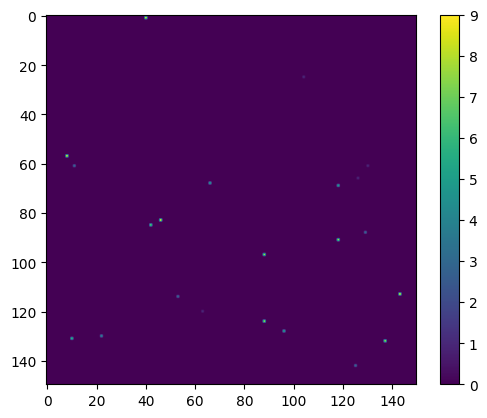

In [12]:
img_size_x = 150
# Determines how wide the image is.

img_size_y = 150
# Determines how high the image is.

img = np.maximum(np.random.randint(-10000, 10, (img_size_y, img_size_x), dtype=np.int16), 0)
src = MockSource(img, 50 * u.nm)

plt.imshow(img)
plt.colorbar()

We now have an object that functions like a camera: when it is triggered and read, it produces an image

We can imagine them as fluorescent beads in a medium

Let's now make a microscope:

In [13]:
### Parameters that can be altered


magnification = 40
# magnification from object plane to camera.

numerical_aperture = 0.85
# numerical aperture of the microscope objective

wavelength = 532.8 * u.nm
# wavelength of the light, different wavelengths are possible, units can be adjusted accordingly.

pixel_size = 6.45 * u.um / np.sqrt(40)
# Size of the pixels on the camera

camera_resolution = (256, 256)
# number of pixels on the camera

p_limit = 10
# Number of iterations. Influences how quick the 'animation' is complete.

## Code

mic = Microscope(src, magnification=magnification, numerical_aperture=numerical_aperture, aberrations=None, wavelength=wavelength,
                 camera_pixel_size=pixel_size, camera_resolution=camera_resolution, truncation_factor=0.5)

mic.camera.shot_noise = True
mic.camera.digital_max = 255


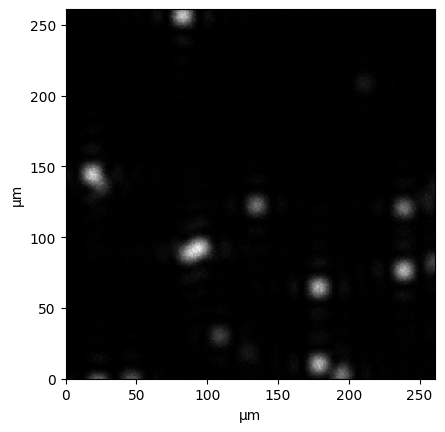

In [14]:
grab_and_show(mic.camera)

Now lets see what happens when we add an abberation of an angled wavefront to the pupil plane:

In [15]:
def make_angled_wavefront(size, slope_x, slope_y):
    # Create a meshgrid of coordinates
    x, y = np.meshgrid(np.linspace(-np.pi, np.pi, size), np.linspace(-np.pi, np.pi, size))

    # Create the square array with specified slopes
    array = (slope_y * y + slope_x * x)

    return array
aberration = MockImageSource.from_image(make_angled_wavefront(img_size_y,0,0), pixel_size=50 * u.nm)

NameError: name 'MockImageSource' is not defined

In [ ]:
mic.aberrations = aberration.from_image(make_angled_wavefront(img_size_y*1,6,0), pixel_size=50 * u.nm)
grab_and_show(mic.camera)

Indeed, the image shifts a little. Adding stronger angled wavefront will result in some reflections, but has the same effect

Adding a diffusive random speckle in the pupil plane, the image will get significantly worse:

In [ ]:
im = np.random.rand(img_size_y, img_size_x)*2*np.pi * 3.0j


mic.aberrations = aberration.from_image(im, pixel_size=50 * u.nm)
grab_and_show(mic.camera)